# Master BigData : Réseaux de Neurones - Perceptrons multi-couche - Projet

Réalisé par Soufiane Boukhasmar et Gaby Maroun 

L’objectif de ce devoir est de produire plusieurs modèles des réseaux de neurones exclusivement sur la base sur le
perceptron multi-couche et sur l’algorithme de rétro-propagation en jouant sur les hyper-paramètres, afin
de réaliser un apprentissage supervisé. Puis de discuter la qualité de déduction des différents réseaux obtenu grâce à la
mise en place d’une expérimentation.


Les bibliothèques utilisé seront les suivants :

In [2]:
# from sklearn.neighbors import KNeighborsClassifier
# — os V. quelconque
# — pandas V. 1.0.3
# — tensorflow V. 2.1.0
# — numpy V. 1.17.2
# — matplotlib V. 3.2.1

import os as os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Le fichier mnist_all.csv contenant les données est fourni au format .csv sans entête et avec la virgule comme
séparateur provient d’une extraction de la base MNIST 1
. Ce fichier comporte 70000 images à répartir dans 3 fichiers
afin d’établir les corpus d’apprentissage, de test et de validation. Chaque ligne du fichier représente une petite image
carrée normalisées de 28 pixels de côté numérisation en 256 niveaux de gris de chiffres manuscrits. La normalisation a
été réalisée automatiquement en calculant le centre de masse des pixels, l’image est ensuite translatée de manière à
positionner ce point au centre de la grille de 28x28.

Chaque ligne est composées de 1+ 784 colonnes du fichier. La première colonne correspond à l’encodage du label (valeur
de 0 à 9 correspondant aux 10 chiffres), les 784 colonnes à l’encodage de l’imagette de 28x28 tel que représenté dans la
Figure 2 avec le réel 0.0 pour la couleur blanche et du réel 1.0 au réel 255.0 pour les
niveaux de gris.

Pour ne pas ecrire le chemin ou on a mis nos fichiers chaque fois, on a creer un variable globale indiquant ce chemin pour etre utiliser pour la suite:

In [3]:
directoryFile = "C:/Users/Gaby\'s/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet"

## Implantation en code python

### 1. Une fonction de lecture d’un fichier au format `.csv` avec ou sans entête (on entend par entête le nom de chacune des colonnes du fichier). La lecture pouvant être réaliser soit sur un disque local, soit via une URL.

Dans notre fonction pour appeller les données d'un fichier ou via une URL, on a utilisé la bibliothèque `pandas` qui rend très simple de lire un fichier csv directement depuis une URL ou sur un disque local.

In [4]:
def csv_reader(file, separator = ",", path= "./", header = False):
    with open(path + "/" + file, 'r') as csvfile:
        if header == True :
            data = pd.read_csv(csvfile, sep = separator, dtype = int )
        elif header == False :
            data = pd.read_csv(csvfile, sep = separator, dtype = int, header = None, prefix="Col" )
        else :
            print("ERROR")
            exit()
    return data

On a chargé les données dans `data` de la manière suivante:

In [5]:
data = csv_reader(file = "mnist_all.csv", path = directoryFile)
data

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col775,Col776,Col777,Col778,Col779,Col780,Col781,Col782,Col783,Col784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Une fonction de production de l’ensemble des données d’apprentissage, des données de test et des données de validation. Cette fonction doit faire appel à un tirage au sort afin d’extraire un certain % des données initiales. Attention, il est préférable que les corpus ainsi constitués soient sauvegardés dans des fichiers `.csv` afin d’avoir toujours la même composition.

Dans la fonction suivante `distribute_dataset`, on va distribuer nos données d'étude passè comme paramètre sur 3 tableaux, en un ratio près de 70% pour le `train_set` alors que les 30% restantes vont etre distribuer également  entre le `test_set` et la `validation_set`. Pour realiser cette distribution, on a appellé le `random` de la bibliothèque `numpy` en choisisant 2 de chaque 3 lignes pour etre inserer dans `train_set` et le troisième va vers un des 2 autres tableau. (2/3=0.66)

In [6]:
def distribute_dataset(data):
    train_set=[]
    test_set=[]
    validation_set=[]
    #Initialisation de random
    np.random.seed(30)    
    #Ouverture et lecture de mnist.csv 
    n=np.array(data)
    i=0
    num=0
    for row in n:
        if i!=0:
            choix=np.random.randint(0,3)
            #Un exemple sur 3 va dans la base de test le reste dans la base d'apprentissage
            if choix==1 :
                if (num % 2) == 0:
                    test_set.append(row)
                    num +=1
                else:
                    validation_set.append(row) 
                    num +=1
            else :
                train_set.append(row)                       
        i+=1

    return test_set, validation_set, train_set

Dans la fonction `csv_writer`, on va d'abord chercher l'existance de 3 fichiers csv qui sont constitué par les valeur distribué par la fonction précédente `distribute_dataset` et si c'est le cas, on va installer ces données dans 3 variables representant les 3 tableaux de distribution avec `csv_reader`.

Alors que si on ne trouve pas ces fichiers `csv`, il y a appelle à la fonction distribute_dataset et les 3 tableaux en résultats seront sauvgarder dans des fichiers csv qui seront créer à l'aide de la bibliotheque `numpy`.

In [7]:
def csv_writer(data, separator = ",", path= "./", header = False):
    if os.path.isfile(path + "/train_set.csv") and os.path.isfile(path + "/test_set.csv") and os.path.isfile(path + "/validation_set.csv"):
        print("Files found, loading ...")
        train_set = csv_reader("train_set.csv", separator, path, header)
        test_set = csv_reader("test_set.csv", separator, path, header)
        validation_set = csv_reader("validation_set.csv",separator, path, header)
    else :
        print("Files NOT found, I'll create new ones")
        test_set, validation_set, train_set = distribute_dataset(data)
        np.savetxt(path + "/test_set.csv", test_set, delimiter = ",")
        np.savetxt(path + "/validation_set.csv", validation_set, delimiter = ",")
        np.savetxt(path + "/train_set.csv", train_set, delimiter = ",")
        
        test_set = pd.DataFrame(test_set).add_prefix('Col')
        validation_set = pd.DataFrame(validation_set).add_prefix('Col')
        train_set = pd.DataFrame(train_set).add_prefix('Col')
        
    return test_set, validation_set, train_set

In [8]:
test_set, validation_set, train_set = csv_writer(data, path = directoryFile)

Files found, loading ...


Un exemple des tableaux résultantes:

In [11]:
test_set

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col775,Col776,Col777,Col778,Col779,Col780,Col781,Col782,Col783,Col784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Des fonctions de création de `dataset` adaptée à la bibliothèque `tensorflow`:
   #### — Utiliser par exemple `tensorflow.data.Dataset.from_tensor_slices` pour lire les valeurs d’une trame de données de `pandas`.
   #### — dont l’un des avantages `tensorflow.data.Dataset` est qu’il permet d’écrire des `pipelines` de données simples et très efficaces.

La fonction `create_tensorflow_dataset`, nous permet de creer des `dataset` de la bibliotheque `tensorflow` en utilisant `from_tensor_slices` et en mettant comme 2 paramètres, le premier les pixels de l'image en etude qui sera remodeler avec ` reshape`, le deuxième sera constitué des valeurs du premier colonne de l’encodage du label.

In [9]:
def create_tensorflow_dataset (data, column_name= 'Col0') :
    #pour ne pas perdre la premiere colonne dans la table de données
    x = data
    y = x.pop(column_name)
    tensorflow_dataset = tf.data.Dataset.from_tensor_slices((x.values.reshape(x.shape[0], 28, 28, 1), y.values))
    return tensorflow_dataset

Comme c'est demandé de créer des fonctions de création de `dataset` adaptée à la bibliothèque `tensorflow`, alors on a créer quelques autres modèle de création de ces `dataset` avec `tf.data.TextLineDataset` qui lit lignes des fichiers passé en paramètre et  `tf.data.Dataset.list_files` pour créer un ensemble de données de tous les fichiers correspondant à un modèle.

In [10]:
def to_dataset_textLine (file1, file2) :
    tensorflow_dataset = tf.data.TextLineDataset([file1, file2]) 
    return tensorflow_dataset

In [11]:
def to_dataset_list_files (path) :
    tensorflow_dataset = tf.data.dataset.list_files(path + "/*.txt")
    return tensorflow_dataset

On execute la fonction `create_tensorflow_dataset` sur nos données:

In [12]:
test_tensorflow_set = create_tensorflow_dataset(test_set)
validation_tensorflow_set = create_tensorflow_dataset(validation_set)
train_tensorflow_set = create_tensorflow_dataset(train_set)

### 4. Une fonction de mélange et de définition du `batch` pour le dataset. Il est essentiel de mélanger l’ensemble de données lors de la phase d’apprentissage et de pouvoir indiquer le nombre d’exemple à fournir pour chaque retro-propagation (taille du batch). Une taille de batch à 1 impliquera qu’à chaque présentation d’exemple en entrée du réseau, le résultat sera retro-propagé.


On utilise `cache()` pour mettre en cache les éléments de cet ensemble de données. La première fois que l'ensemble de données est itéré, ses éléments seront mis en cache soit dans le fichier spécifié, soit en mémoire. Les itérations suivantes utiliseront les données mise en cache. 

Pour faire ce mélange et définition du batch, on a utilisé `.shuffle()` et `.batch()`.

In [13]:
def shuffle_batch(data_set, batch = 1, shuffle = 1000):
    data_set = data_set.cache()
    data_set = data_set.shuffle(shuffle).batch(batch)
    return data_set

On execute la fonction `shuffle_batch` sur nos données:

In [14]:
shuffled_test = shuffle_batch(test_tensorflow_set, 28)
shuffled_validation = shuffle_batch(validation_tensorflow_set, 28)
shuffled_train = shuffle_batch(train_tensorflow_set, 28)

### 5. une fonction qui permet de définir le modèle de réseau de neurone que l’on souhaite exécuter :
####    — Le modèle `sequential` de `tensorflow` est un empilement linéaire de couches, autrement dit un perceptron multicouche.


Dans notre modèle du perceptron mutlicouche, on choisit comme des couches de convolution 2D qui est utilisé pour les images 2D comme dans notre cas et des couche d'opération de regroupement maximale pour les données spatiales. Pour commencer c'etait la couche `conv2D` puis une couche `MaxPooling2D` et on a repeter ce choix une deuxieme fois puis on a mis une troisième couche `conv2D` avec un mode d'activation spécifique.

Après finir d'ajouter ces différentes couches, il faut faire un Applatissement à l'aide de `flatten` afin de les envoyer vers les couches invisible.

Les couches invisible seront construit à l'aide de `Dense`. On a choisit, et après plusieurs experimentation, 3 couches dense avec différents choix de modèle d'activation. (vous pouvez consulter ci-dessous leurs résultats de précision en commentaire)

On termine notre modèle par l'ajout d'une couche `softmax` representant l'output.

In [15]:
def createNRModel():
    #Création du réseau de neurones
    myModel = tf.keras.models.Sequential()

    #Ajout d'une couche convolutionnel de taille 32 et de filtre 3 x 3 
    myModel.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1)))
    #model1.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1)))

    #Ajout d'une couche pooling 2 x 2
    myModel.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    #model1.add(MaxPooling2D(pool_size=(2, 2)))

    #Ajout d'une couche convolutionnel de taille 64 et de filtre 3 x 3 
    myModel.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(26, 26)))
    #model1.add(Conv2D(64, kernel_size=(3,3), input_shape=(26, 26)))

    #Ajout d'une couche pooling 2 x 2
    myModel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    #Ajout d'une couche convolutionnel de taille 32 et de filtre 3 x 3 avec un modele d'activation 
    myModel.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='elu'))

    #Applatissement de la dernière couche pour l'envoyer en entrée d'une couche dense
    myModel.add(tf.keras.layers.Flatten())

    #Ajout d'une couche dense
    myModel.add(tf.keras.layers.Dense(128, activation='elu')) #0.0591 98.68
#     myModel.add(tf.keras.layers.Dense(128, activation='tanh')) #0.1446 95.54  
#     myModel.add(tf.keras.layers.Dense(128, activation='sigmoid')) #94 0.14
#     myModel.add(tf.keras.layers.Dense(128, activation='selu')) 0.0867 97.70
#     myModel.add(tf.keras.layers.Dense(128, activation='relu')) #97
#     myModel.add(tf.keras.layers.Dense(128, activation='hard_sigmoid'))#0.1498 95
#     myModel.add(tf.keras.layers.Dense(128, activation='exponential')) #nan 09.82
#     myModel.add(tf.keras.layers.Dense(128, activation='linear')) #0.2157  95

    #Ajout d'une couche dense
    myModel.add(tf.keras.layers.Dense(128, activation='elu'))
    
    #Ajout d'une couche dense
    myModel.add(tf.keras.layers.Dense(128, activation='elu'))
    
    #Ajout d'une couche softmax comme output
    myModel.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return myModel

### 6. une fonction de sauvegarde au ‘fil de l’eau.‘ Elle doit permettre de réutiliser un modèle stabilisé après la phase d’apprentissage sans avoir à relancer cette phase. Elle peut également permettre de reprendre l’apprentissage là où vous l’avez laissée, au cas où le processus d’apprentissage aurait été interrompu. L’appel à `tensorflow.keras.callbacks.ModelCheckpoint` permet de sauvegarder en permanence le modèle pendant et à la fin de la phase d’apprentissage.

La fonction `compileRN` nous permet de tourner le modèle et de le compiler en choisissant l'optimizateur optimale que l'on souhaite. En cas de récuperation des données d'un checkpoint sauvgarder quelque part, on a utilisé `load_weights`

In [16]:
def compileRN(path="./", load=False, opt='Adamax'):
    myModel = createNRModel()
    
    if load :
        myModel.load_weights(path+"/Projetcp.ckpt")
        
#  Compilation du modèle, avec comme méthode d'entraînement adam (converge 
# plus vite), et comme loss categorical_cross_entropy et comme métrique accuracy        
    myModel.compile(optimizer=opt, 
    #               adam, 0.0960 97.55
    #               RMSprop, 0.1790  97
    #               Adagrad, 0.0708  98.41
    #               Adadelta, 0.0711 98.39
    #               Adamax, 0.0655 98.51/ 0.0591 98.68
    #               Nadam, 0.1469 9.39
    #               SGD, nan  9.82
                  loss='sparse_categorical_crossentropy', #0.0884 97,69
    #               loss='mean_squared_logarithmic_error', #nan 0
    #               loss='mean_absolute_error', #nan  0
    #               loss='hinge', #0.9098 0
    #               loss='squared_hinge',
    #               loss='kullback_leibler_divergence', #20.7658  0
    #               loss='categorical_crossentropy', #29826.2692 0
                    metrics=['accuracy']),
    #               metrics=['mse'])

    return myModel


La fonction `fitModel` compare les résultats entre 2 dataset, celle du train et celle de validation, et nous renvoit le pourcentage de précision de notre modèle, en plus du pourcentage des valeur perdues au moment de l'execution.

Tout la demarche sera sauvegarder dans un fichier pour les récupèrer après en cas de demande à l'aide de `tf.keras.callbacks.ModelCheckpoint`

In [17]:
def fitModel(shuffled_train,shuffled_validation, epochsN = 3, 
             weight = False, pathf ='./', optimizer = 'Adamax'):

    myModel = compileRN(path =pathf + "/", load = weight, opt= optimizer)
    
    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = pathf + "/Projetcp.ckpt", 
                                                   save_weigths_only = True, 
                                                   verbose = 2)
    #Entrainement du modèle 
    history = myModel.fit(shuffled_train, epochs = epochsN, 
                          callbacks=[cp_callback], 
                          validation_data = shuffled_validation)
    
    return myModel

L'évaluation du modèle sur les données de test sera fait à l'aide de `evaluateModel` :

In [18]:
def evaluateModel(myModel):  
    loss, accuracy = myModel.evaluate(shuffled_test, verbose=2)
    return loss, accuracy

## Expérimentation et discussion des résultats

Dans cette deuxième partie il sera nécessaire d'ajouter du code source pour permettre l'affichage graphique de différentes informations, d'où l'utilisation de la bibliothèque matplotlib
différentes informations, d’où l’utilisation de la bibliothèque matplotlib
* l’expérimentation portera sur l’étude puis le choix des différentes hyper-paramètres (nombre de couches cachées, nombre de cellules par couche cachée, type de fonction d’activation, taille du batch, . . . ) afin d’obtenir la meilleure configuration.
* Le premier objectif étant d’obtenir un taux d’erreur de catégorisation le plus faible possible lors de la phase d’apprentissage et de test.
* Le deuxième objectif est d’obtenir les meilleurs taux de réussite sur les chiffres manuscrits de la base de validation.
* Il sera donc nécessaire d’avoir testé et de présenter les résultats obtenus sur au minimum 3 configurations différentes.

Une description détaillée de la démarche adoptée pour réaliser l’expérimentation doit être donnée et illustrée dans cette
partie.

In [19]:
myModel = fitModel(shuffled_train, shuffled_validation, epochsN = 3, pathf =directoryFile)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/3
1666/1667 [============================>.] - ETA: 0s - loss: 0.3494 - acc: 0.9066
Epoch 00001: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [==============================] - 34s 20ms/step - loss: 0.3492 - acc: 0.9066 - val_loss: 0.1996 - val_acc: 0.9477
Epoch 2/3
1665/1667 [============================>.] - ETA: 0s - loss: 0.1212 - acc: 0.9640- ETA
Epoch 00002: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [==============================] - 29s 17ms/step - loss: 0.1212 - acc: 0.9640 - val_loss: 0.1192 - val_acc: 0.9663
Epoch 3/3
1663/1667 [============================>.] - ETA: 0s - loss: 0.0719 - acc: 0.9773
Epoch 00003: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [======================

In [23]:
#Évaluation du modèle
# test_loss, test_acc = model.evaluate(shuffled_test, verbose=2)
loss, accuracy = evaluateModel(myModel)

417/417 - 2s - loss: 0.0740 - acc: 0.9846


In [22]:
##for testing epochs
epochs = [1,2,3,4,5,6,7,8,9,10]
with open(directoryFile + "/epochs.txt", "w+") as f:
    for epoch in epochs:
        print("\n")
        print("************** Nombre de epoch : "+str(epoch)+" **************")
        print("\n")
        myModel = fitModel(shuffled_train, shuffled_validation, epochsN = epoch, pathf =directoryFile)
        test_loss, test_accuracy = evaluateModel(myModel)
    
        f.write("\nLoss:"+   str(round(test_loss,2)))
        f.write("\nAccuracy:"+  str(round(test_accuracy,2)))        
        



************** Nombre de epoch : 1 **************


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
1663/1667 [============================>.] - ETA: 0s - loss: 0.3179 - acc: 0.9085
Epoch 00001: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [==============================] - 34s 20ms/step - loss: 0.3175 - acc: 0.9086 - val_loss: 0.1672 - val_acc: 0.9519
417/417 - 3s - loss: 0.1626 - acc: 0.9524


************** Nombre de epoch : 2 **************


Epoch 1/2
1666/1667 [============================>.] - ETA: 0s - loss: 0.3208 - acc: 0.9114
Epoch 00001: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [==============================] - 33s 20ms/step - loss: 0.3206 - acc: 0.9114 - val_loss: 0.1662 - val_acc: 0.9562
Epoch 2/2
1664/1667 [============================>.] - ETA: 0s - loss: 0.1087 - acc: 0.9676
Epoc

Epoch 3/7
1663/1667 [============================>.] - ETA: 0s - loss: 0.0664 - acc: 0.9805
Epoch 00003: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [==============================] - 24s 14ms/step - loss: 0.0664 - acc: 0.9805 - val_loss: 0.0879 - val_acc: 0.9731
Epoch 4/7
1666/1667 [============================>.] - ETA: 0s - loss: 0.0415 - acc: 0.9868
Epoch 00004: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [==============================] - 28s 17ms/step - loss: 0.0415 - acc: 0.9868 - val_loss: 0.0751 - val_acc: 0.9801
Epoch 5/7
1664/1667 [============================>.] - ETA: 0s - loss: 0.0285 - acc: 0.9907
Epoch 00005: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [==============================] - 24s 15ms/step - loss: 0.0285 - acc: 0.9908 - val_loss: 0.0757 - val_acc: 0.9813
Epoch 6/7
1664/1667 [==========

Epoch 4/10
1664/1667 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9871
Epoch 00004: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [==============================] - 24s 14ms/step - loss: 0.0421 - acc: 0.9871 - val_loss: 0.0772 - val_acc: 0.9784
Epoch 5/10
1663/1667 [============================>.] - ETA: 0s - loss: 0.0309 - acc: 0.9904
Epoch 00005: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [==============================] - 25s 15ms/step - loss: 0.0308 - acc: 0.9904 - val_loss: 0.0719 - val_acc: 0.9818
Epoch 6/10
1662/1667 [============================>.] - ETA: 0s - loss: 0.0218 - acc: 0.9928
Epoch 00006: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
1667/1667 [==============================] - 24s 14ms/step - loss: 0.0218 - acc: 0.9928 - val_loss: 0.0825 - val_acc: 0.9807
Epoch 7/10
1663/1667 [======

[0.16, 0.1, 0.08, 0.08, 0.07, 0.07, 0.08, 0.07, 0.07, 0.07] 
 [0.95, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99]


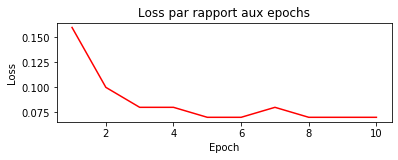

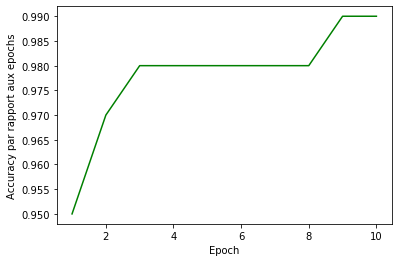

In [23]:
with open(directoryFile + "/epochs.txt", "r") as f:
    ls = f.readlines()
    epoch = [1,2,3,4,5,6,7,8,9,10]
    loss = []
    accuracy=[]
    for l in ls:
        if l.startswith('Loss'): 
            loss.append(float(l.split(":")[1].split("\n")[0]))
        elif l.startswith('Accuracy'): 
            accuracy.append(float(l.split(":")[1].split("\n")[0]))
    print(loss,"\n", accuracy)
    
    plt.subplot(211)    
    plt.plot(epoch, loss, color="red", label="loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title("Loss par rapport aux epochs")

    plt.figure(2)
    plt.plot(epoch, accuracy, color="green", label="acc")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy par rapport aux epochs')
    plt.show()

In [21]:
##for testing batch
batchs = [1,2,4,8,16,32,128,256]
with open(directoryFile + "/batchs.txt", "w+") as f:
    for batch in batchs:
        shuffled_test = shuffle_batch(test_tensorflow_set, batch)
        shuffled_validation = shuffle_batch(validation_tensorflow_set, batch)
        shuffled_train = shuffle_batch(train_tensorflow_set, batch)
        print("\n")
        print("************** Nombre de batch : "+str(batch)+" **************")
        print("\n")
   
        myModel = fitModel(shuffled_train, shuffled_validation, epochsN = 1, pathf =directoryFile)
        test_loss, test_accuracy = evaluateModel(myModel)
    
        f.write("Loss par raport au nombre de batch ,"+   str(round(test_loss,3))+"\n")
        f.write("Accuracy par raport au nombre de batch,"+  str(round(test_accuracy,3))+"\n")
              



************** Nombre de batch : 1 **************


46646/46660 [============================>.] - ETA: 0s - loss: 0.2613 - acc: 0.9306
Epoch 00001: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
46660/46660 [==============================] - 239s 5ms/step - loss: 0.2612 - acc: 0.9307 - val_loss: 0.1286 - val_acc: 0.9679
11670/11670 - 15s - loss: 0.1246 - acc: 0.9704


************** Nombre de batch : 2 **************


23326/23330 [============================>.] - ETA: 0s - loss: 0.2397 - acc: 0.9344
Epoch 00001: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
23330/23330 [==============================] - 110s 5ms/step - loss: 0.2397 - acc: 0.9344 - val_loss: 0.1148 - val_acc: 0.9702
5835/5835 - 7s - loss: 0.0982 - acc: 0.9725


************** Nombre de batch : 4 **************


11663/11665 [============================>.] - ETA: 0s - loss: 0.2494 - acc: 0.9304
Epoch 00001: saving model to 

[0.125, 0.098, 0.102, 0.132, 0.163, 0.165, 0.198, 0.29] 
 [0.97, 0.972, 0.972, 0.961, 0.954, 0.951, 0.941, 0.908]


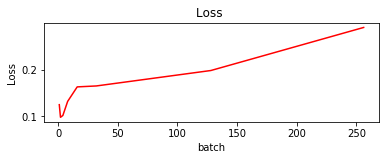

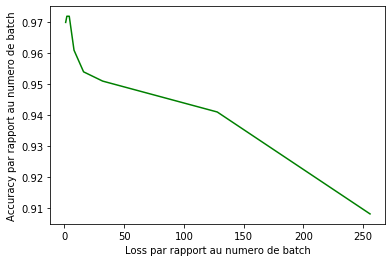

In [23]:
with open(directoryFile + "/batchs.txt", "r") as f:
    ls = f.readlines()
    batchs = [1,2,4,8,16,32,128,256]
    loss = []
    accuracy=[]
    for l in ls:
        if l.startswith('Loss'): 
            loss.append(float(l.split(",")[1].split("\n")[0]))
        elif l.startswith('Accuracy'): 
            accuracy.append(float(l.split(",")[1].split("\n")[0]))
    print(loss,"\n", accuracy)
    
    plt.subplot(211)    
    plt.plot(batchs, loss, color="red", label="loss")
    plt.xlabel('batch')
    plt.ylabel('Loss')
    plt.title("Loss ")

    plt.figure(2)
    plt.plot(batchs, accuracy, color="green", label="acc")
    plt.xlabel('Loss par rapport au numero de batch')
    plt.ylabel('Accuracy par rapport au numero de batch')
    plt.show()

In [25]:
# for testing optimizer
optimizers = ["RMSprop","Adagrad","Nadam","Adadelta","adam","Adamax"]  

with open(directoryFile + "/optimizers.txt", "w+") as f:
    for opt in optimizers:
        print("\n")
        print("************** optimizer : "+opt+" **************")
        print("\n")

        myModel = fitModel(shuffled_train, shuffled_validation, epochsN = 1, pathf = directoryFile, optimizer = opt)
        test_loss, test_acc = evaluateModel(myModel)
        
        f.write("Loss,"+   str(round(test_loss,3))+"\n")
        f.write("Accuracy,"+  str(round(test_acc,3))+"\n")
        
                



************** optimizer : RMSprop **************


182/183 [============================>.] - ETA: 0s - loss: 0.7594 - acc: 0.8427
Epoch 00001: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
183/183 [==============================] - 27s 150ms/step - loss: 0.7553 - acc: 0.8429 - val_loss: 0.2259 - val_acc: 0.9362
46/46 - 2s - loss: 0.2075 - acc: 0.9380


************** optimizer : Adagrad **************


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
182/183 [============================>.] - ETA: 0s - loss: 1.0358 - acc: 0.7788
Epoch 00001: saving model to C:/Users/Gaby's/Desktop/Semestre 2 UPPA/Réseau Neurones/Projet/Projetcp.ckpt
183/183 [==============================] - 26s 143ms/step - loss: 1.0326 - acc: 0.7790 - val_loss: 0.4570 - val_acc: 0.8722
46/46 - 2s - loss: 0.4633 - acc: 0.8700


************** optimizer : Nadam **************


182/183 [=============

[0.938, 0.87, 0.949, 0.164, 0.943, 0.926] 
 [0.208, 0.463, 0.167, 9.772, 0.189, 0.247]
[0 1 2 3 4 5]


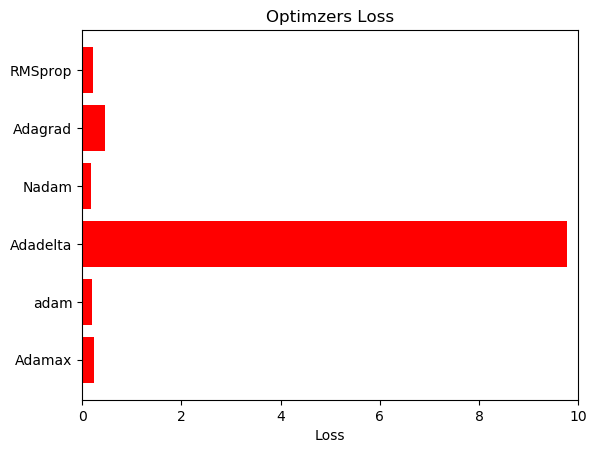

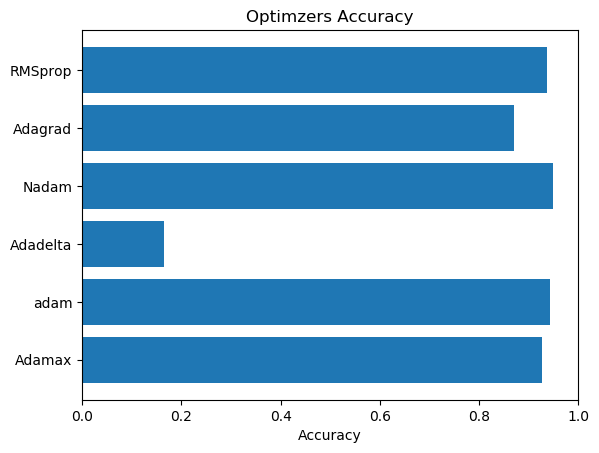

In [30]:
optimizers = ["RMSprop","Adagrad","Nadam","Adadelta","adam","Adamax"]  
loss = []
accuracy=[]
with open(directoryFile +"/optimizers.txt", "r") as f:
    ls = f.readlines()

    for l in ls:
        if l.startswith('Accuracy'): 
            loss.append(float(l.split(",")[1].split("\n")[0]))
        elif  l.startswith('Loss'): 
            accuracy.append(float(l.split(",")[1].split("\n")[0]))
    print(loss,"\n", accuracy)

    
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(optimizers))
    print(y_pos)
    ax.barh(y_pos, accuracy,  align='center', color='red')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(optimizers)
    ax.invert_yaxis() 
    plt.xlim(0,10)# labels read top-to-bottom
    ax.set_xlabel('Loss')
    ax.set_title('Optimzers Loss')
    
    plt.rcdefaults()
    fig1, ax1 = plt.subplots()
    ax1.barh(y_pos, loss,  align='center')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(optimizers)
    ax1.invert_yaxis() 
    plt.xlim(0,1)# labels read top-to-bottom
    ax1.set_xlabel('Accuracy')
    ax1.set_title('Optimzers Accuracy')
    plt.show()